### V0.1 - Czysty Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Libraries
import random
import numpy as np
import pandas as pd
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import tensorflow as tf
import numpy as np
from google.colab import files
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#app



def welcome_message():
    print("Welcome to the throat inflammation diagnosis application")
    print("Please enter the file name of the mouth image to receive a diagnosis.")

def get_user_input():
    file_name = input("Enter the file name: ")
    print(f"Loaded file: {file_name}")
    return file_name

def simulate_diagnosis():
    possible_diagnoses = ['Throat inflammation', 'No throat inflammation', 'Mild throat inflammation']
    return random.choice(possible_diagnoses)

def display_diagnosis(diagnosis):
    print(f"Diagnosis: {diagnosis}")

def run_app():
    welcome_message()

    while True:
        get_user_input()
        diagnosis = simulate_diagnosis()
        display_diagnosis(diagnosis)

        continue_choice = input("Do you want to make another diagnosis? (yes/no): ").lower()
        if continue_choice != 'yes':
            print("Thank you for using the application")
            break


In [ ]:


run_app()

Welcome to the throat inflammation diagnosis application
Please enter the file name of the mouth image to receive a diagnosis.
Enter the file name: 
Loaded file: 
Diagnosis: No throat inflammation
Do you want to make another diagnosis? (yes/no): 
Thank you for using the application


### V0.2 - NumPy

In [ ]:
#app
def welcome_message():
    print("Welcome to the throat inflammation diagnosis application")
    print("Please enter the file name of the mouth image to receive a diagnosis.")

def get_user_input():
    file_name = input("Enter the file name: ")
    print(f"Loaded file: {file_name}")
    return file_name

def simulate_image_processing():
    image_data = np.random.randint(0, 256, (100, 100))
    return image_data

def simulate_diagnosis():
    possible_diagnoses = ['Throat inflammation', 'No throat inflammation', 'Mild throat inflammation']
    return random.choice(possible_diagnoses)

def store_results_in_dataframe(file_name, diagnosis, image_data):
    data_dict = {
        "File Name": [file_name],
        "Diagnosis": [diagnosis],
        "Mean Pixel Value": [np.mean(image_data)],
        "Max Pixel Value": [np.max(image_data)],
        "Min Pixel Value": [np.min(image_data)]
    }

    df = pd.DataFrame(data_dict)
    return df

def run_app():
    welcome_message()

    results_df = pd.DataFrame(columns=["File Name", "Diagnosis", "Mean Pixel Value", "Max Pixel Value", "Min Pixel Value"])

    while True:
        file_name = get_user_input()
        image_data = simulate_image_processing()
        diagnosis = simulate_diagnosis()

        result_df = store_results_in_dataframe(file_name, diagnosis, image_data)

        results_df = pd.concat([results_df, result_df], ignore_index=True)

        continue_choice = input("Do you want to make another diagnosis? (yes/no): ").lower()
        if continue_choice != 'yes':
            print("\nResults:")
            print(results_df)
            print("Thank you for using the application")
            break


In [ ]:




run_app()

Welcome to the throat inflammation diagnosis application
Please enter the file name of the mouth image to receive a diagnosis.
Enter the file name: 


<ipython-input-5-60a4e05bb033>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, result_df], ignore_index=True)


Loaded file: 
Do you want to make another diagnosis? (yes/no): 

Results:
  File Name               Diagnosis  Mean Pixel Value Max Pixel Value  \
0            No throat inflammation           127.648             255   

  Min Pixel Value  
0               0  
Thank you for using the application


Model accuracy: 0.73
                precision    recall  f1-score   support

No Pharyngitis       0.87      0.65      0.74        20
   Pharyngitis       0.61      0.85      0.71        13

      accuracy                           0.73        33
     macro avg       0.74      0.75      0.73        33
  weighted avg       0.77      0.73      0.73        33



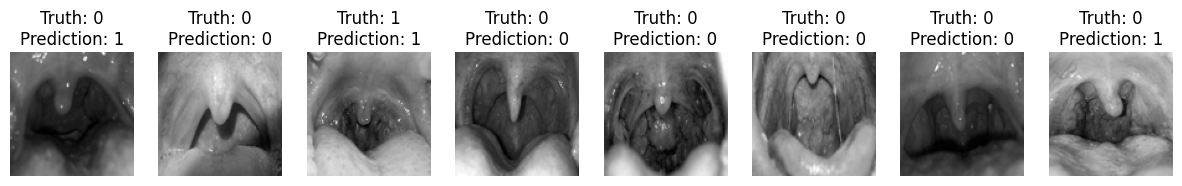

In [ ]:

#Paths to the data directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/DEntosept/Dataset/Pharyngitis_dataset/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/DEntosept/Dataset/Pharyngitis_dataset/test'

#Function to load training data
def load_train_data(train_dir, target_size=(100, 100)):
    images = []
    labels = []

    #Folder with images without pharyngitis
    no_dir = os.path.join(train_dir, 'no')
    for filename in os.listdir(no_dir):
        if filename.endswith('.JPG') or filename.endswith('.jpg'):
            img_path = os.path.join(no_dir, filename)
            image = Image.open(img_path).convert('L')
            image = image.resize(target_size)
            image = np.array(image)
            images.append(image)
            labels.append(0)  #Label 0 for No Pharyngitis

    #Folder with images of pharyngitis
    phar_dir = os.path.join(train_dir, 'phar')
    for filename in os.listdir(phar_dir):
        if filename.endswith('.JPG') or filename.endswith('.jpg'):
            img_path = os.path.join(phar_dir, filename)
            image = Image.open(img_path).convert('L')
            image = image.resize(target_size)
            image = np.array(image)
            images.append(image)
            labels.append(1)  # Label 1 for Pharyngitis

    return np.array(images), np.array(labels)

#Function to load test data
def load_test_data(test_dir, target_size=(100, 100)):
    images = []
    labels = []

    for filename in os.listdir(test_dir):
        if filename.endswith('.JPG') or filename.endswith('.jpg'):
            img_path = os.path.join(test_dir, filename)
            image = Image.open(img_path).convert('L')
            image = image.resize(target_size)
            image = np.array(image)
            images.append(image)

            # Assign label based on filename
            if 'no_pharyngitis' in filename.lower():
                labels.append(0)
            elif 'pharyngitis' in filename.lower():
                labels.append(1)

    return np.array(images), np.array(labels)

#Loading data
train_images, train_labels = load_train_data(train_dir)
test_images, test_labels = load_test_data(test_dir)

#Function to flatten images
def flatten_images(images):
    return images.reshape(images.shape[0], -1)

#Flattening images
X_train = flatten_images(train_images)
X_test = flatten_images(test_images)

#Logistic regression model
model = LogisticRegression(max_iter=100)

#Training the model
model.fit(X_train, train_labels)

#Prediction
y_pred = model.predict(X_test)

#Results
accuracy = accuracy_score(test_labels, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

#Classification report
print(classification_report(test_labels, y_pred, target_names=['No Pharyngitis', 'Pharyngitis']))

#Function to visualize results
def show_predictions(images, true_labels, predicted_labels, n=8):
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i in range(n):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f'Truth: {true_labels[i]}\nPrediction: {predicted_labels[i]}')
        ax.axis('off')
    plt.show()

#Displaying results for a few samples
show_predictions(test_images, test_labels, y_pred)


Model accuracy: 0.73
                precision    recall  f1-score   support

No Pharyngitis       0.87      0.65      0.74        20
   Pharyngitis       0.61      0.85      0.71        13

      accuracy                           0.73        33
     macro avg       0.74      0.75      0.73        33
  weighted avg       0.77      0.73      0.73        33



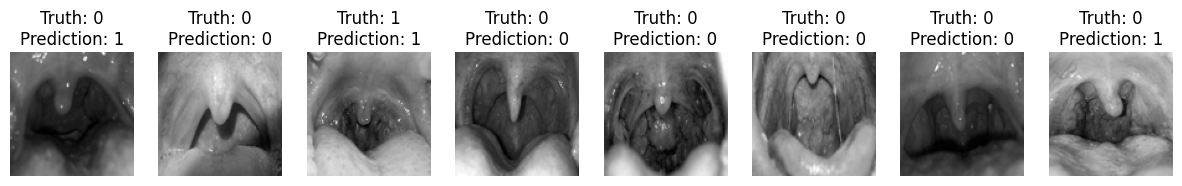

In [ ]:


#Paths to the data directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/DEntosept/Dataset/Pharyngitis_dataset/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/DEntosept/Dataset/Pharyngitis_dataset/test'

#Function to load training data
def load_train_data(train_dir, target_size=(100, 100)):
    images = []
    labels = []

    #Folder with images without pharyngitis
    no_dir = os.path.join(train_dir, 'no')
    for filename in os.listdir(no_dir):
        if filename.endswith('.JPG') or filename.endswith('.jpg'):
            img_path = os.path.join(no_dir, filename)
            image = Image.open(img_path).convert('L')
            image = image.resize(target_size)
            image = np.array(image)
            images.append(image)
            labels.append(0)  # Label 0 for No Pharyngitis

    #Folder with images of pharyngitis
    phar_dir = os.path.join(train_dir, 'phar')
    for filename in os.listdir(phar_dir):
        if filename.endswith('.JPG') or filename.endswith('.jpg'):
            img_path = os.path.join(phar_dir, filename)
            image = Image.open(img_path).convert('L')
            image = image.resize(target_size)
            image = np.array(image)
            images.append(image)
            labels.append(1)  #Label 1 for Pharyngitis

    return np.array(images), np.array(labels)

#Function to load test data
def load_test_data(test_dir, target_size=(100, 100)):
    images = []
    labels = []

    for filename in os.listdir(test_dir):
        if filename.endswith('.JPG') or filename.endswith('.jpg'):
            img_path = os.path.join(test_dir, filename)
            image = Image.open(img_path).convert('L')
            image = image.resize(target_size)
            image = np.array(image)
            images.append(image)

            #Assign label based on filename
            if 'no_pharyngitis' in filename.lower():
                labels.append(0)
            elif 'pharyngitis' in filename.lower():
                labels.append(1)

    return np.array(images), np.array(labels)

#Loading data
train_images, train_labels = load_train_data(train_dir)
test_images, test_labels = load_test_data(test_dir)

#Function to flatten images
def flatten_images(images):
    return images.reshape(images.shape[0], -1)

#Flattening images
X_train = flatten_images(train_images)
X_test = flatten_images(test_images)

#Logistic regression model
model = LogisticRegression(max_iter=100)

#Training the model
model.fit(X_train, train_labels)

#Prediction
y_pred = model.predict(X_test)

#Results
accuracy = accuracy_score(test_labels, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

#Classification report
print(classification_report(test_labels, y_pred, target_names=['No Pharyngitis', 'Pharyngitis']))

#Function to visualize results
def show_predictions(images, true_labels, predicted_labels, n=8):
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i in range(n):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f'Truth: {true_labels[i]}\nPrediction: {predicted_labels[i]}')
        ax.axis('off')
    plt.show()

#displaying results for a few samples
show_predictions(test_images, test_labels, y_pred)


In [ ]:
from tensorflow.keras import models, layers
#Path to the training data folder
train_dir = '/content/drive/MyDrive/Colab Notebooks/DEntosept/Dataset/Pharyngitis_dataset/train'

#Function to load training data
def load_train_data(train_dir, target_size=(100, 100)):
    images = []
    labels = []

    #Folder with "no pharyngitis" images
    no_dir = os.path.join(train_dir, 'no')
    for filename in os.listdir(no_dir):
        if filename.endswith('.JPG') or filename.endswith('.jpg'):
            img_path = os.path.join(no_dir, filename)
            image = Image.open(img_path).convert('L')
            image = image.resize(target_size)
            image = np.array(image)
            images.append(image)
            labels.append(0)

    #Folder with "pharyngitis" images
    phar_dir = os.path.join(train_dir, 'phar')
    for filename in os.listdir(phar_dir):
        if filename.endswith('.JPG') or filename.endswith('.jpg'):
            img_path = os.path.join(phar_dir, filename)
            image = Image.open(img_path).convert('L')
            image = image.resize(target_size)
            image = np.array(image)
            images.append(image)
            labels.append(1)

    return np.array(images), np.array(labels)


train_images, train_labels = load_train_data(train_dir)


train_images = train_images / 255.0

train_images = train_images.reshape(train_images.shape[0], 100, 100, 1)


X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))


model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))


model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))


model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())


model.add(layers.Dropout(0.5))


model.add(layers.Dense(512, activation='relu'))


model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,289,857 (4.92 MB)

 Trainable params: 1,289,857 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 624ms/step - accuracy: 0.5673 - loss: 0.6923 - val_accuracy: 0.4375 - val_loss: 0.6897
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 982ms/step - accuracy: 0.5133 - loss: 0.6913 - val_accuracy: 0.6719 - val_loss: 0.6400
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 813ms/step - accuracy: 0.5481 - loss: 0.6747 - val_accuracy: 0.7500 - val_loss: 0.6150
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 851ms/step - accuracy: 0.6304 - loss: 0.6765 - val_accuracy: 0.5938 - val_loss: 0.6641
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 575ms/step - accuracy: 0.6536 - loss: 0.6627 - val_accuracy: 0.7656 - val_loss: 0.6238
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 995ms/step - accuracy: 0.7186 - loss: 0.5975 - val_accuracy: 0.7656 - val_loss: 0.5157
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 606ms/step - accuracy: 0.6929 - loss: 0.5985 - val_accuracy: 0.7812 - val_loss: 0.5672
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 829ms/step - accuracy: 0.7207 - loss: 0.5698 - val_accuracy: 0.5312 - val_los

In [ ]:
# Function to load test data
def load_test_data(test_dir, target_size=(100, 100)):
    images = []
    labels = []

    for filename in os.listdir(test_dir):

        if filename.lower().endswith('.jpg') or filename.lower().endswith('.jpeg') or filename.lower().endswith('.JPG'):
            img_path = os.path.join(test_dir, filename)
            image = Image.open(img_path).convert('L')
            image = image.resize(target_size)
            image = np.array(image)
            images.append(image)


            if 'no_pharyngitis' in filename.lower():
                labels.append(0)
            elif 'pharyngitis' in filename.lower():
                labels.append(1)

    return np.array(images), np.array(labels)


test_dir = '/content/drive/MyDrive/Colab Notebooks/DEntosept/Dataset/Pharyngitis_dataset/test'


test_images, test_labels = load_test_data(test_dir)


test_images = test_images / 255.0

test_images = test_images.reshape(test_images.shape[0], 100, 100, 1)

print(f"Loaded {len(test_images)} images in the test set.")
print(f"Test labels: {np.unique(test_labels)}")


Loaded 33 images in the test set.
Test labels: [0 1]


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8476 - loss: 0.3967 - val_accuracy: 0.8438 - val_loss: 0.4604
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 602ms/step - accuracy: 0.9003 - loss: 0.3134 - val_accuracy: 0.8125 - val_loss: 0.4685
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - accuracy: 0.8550 - loss: 0.3583 - val_accuracy: 0.7812 - val_loss: 0.5117
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 607ms/step - accuracy: 0.8782 - loss: 0.2812 - val_accuracy: 0.8594 - val_loss: 0.4422
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 852ms/step - accuracy: 0.9027 - loss: 0.2398 - val_accuracy: 0.8281 - val_loss: 0.4986
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 695ms/step - accuracy: 0.9170 - loss: 0.1971 - val_accuracy: 0.8750 - val_loss: 0.4843
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 838ms/step - accuracy: 0.9349 - loss: 0.1860 - val_accuracy: 0.7812 - val_loss: 0.5719
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 600ms/step - accuracy: 0.9433 - loss: 0.1507 - val_accuracy: 0.8750 - val_loss: 

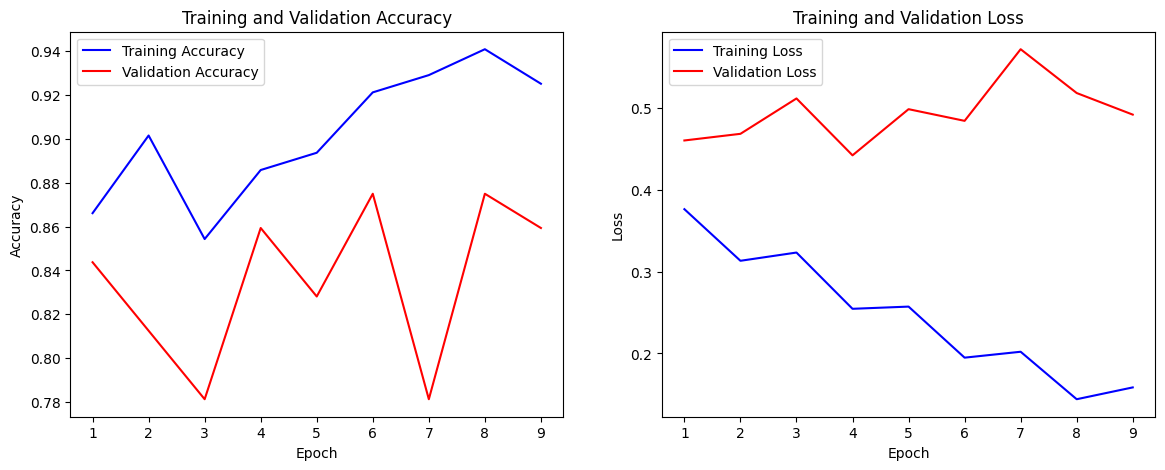

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8469 - loss: 0.2631 
Test Loss: 0.2608
Test Accuracy: 0.8485


In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Training the model with EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

#Function to plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))


    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label="Training Accuracy")
    plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label="Training Loss")
    plt.plot(epochs, val_loss, 'r', label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


plot_training_history(history)


test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:

df_test_metrics = pd.DataFrame({
    "epoch": ['test'],
    "accuracy": [0.8182],
    "loss": [0.3921],
    "val_accuracy": [None],
    "val_loss": [None]
})


df_test_metrics = df_test_metrics.fillna(value=np.nan)


df_history = pd.DataFrame({
    "epoch": [1, 2, 3],
    "accuracy": [0.6322, 0.6961, 0.7285],
    "loss": [0.6189, 0.6055, 0.5566],
    "val_accuracy": [0.7812, 0.8125, 0.7031],
    "val_loss": [0.5263, 0.5299, 0.5427]
})


df_history = pd.concat([df_history, df_test_metrics], ignore_index=True)

df_history.to_csv('training_metrics.csv', index=False)

print("Results saved in 'training_metrics.csv'")
files.download('training_metrics.csv')


Results saved in 'training_metrics.csv'


<ipython-input-16-9ff2b6d84830>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test_metrics = df_test_metrics.fillna(value=np.nan)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# augmentation dataa
# - Adaptive Augmentation -> Random Erasing
# - GAN
# Transfer Learning
# - VGG, ResNet
# - Fine-tuning
# - Feature Extraction
# L2 Regularization (L1, L2, Elastic Net)


In [ ]:
# Path to the test directory
test_dir = '/content/drive/MyDrive/Colab Notebooks/DEntosept/Dataset/Pharyngitis_dataset/test'

# Creating lists of file paths and corresponding labels
file_paths = []
labels = []

for file in os.listdir(test_dir):
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        file_paths.append(os.path.join(test_dir, file))


        if "no_pharyngitis" in file.lower():
            labels.append("no_pharyngitis")
        elif "pharyngitis" in file.lower():
            labels.append("pharyngitis")
        else:
            print(f"File skipped (does not match classes): {file}")

# Creating a DataFrame
df = pd.DataFrame({"filename": file_paths, "class": labels})


print("DataFrame preview:")
print(df.head())
print("\nUnique classes:", df['class'].unique())
print("Number of files in each class:")
print(df['class'].value_counts())

# Creating a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filename",
    y_col="class",
    target_size=(100, 100),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)


DataFrame preview:
                                            filename           class
0  /content/drive/MyDrive/Colab Notebooks/DEntose...  no_pharyngitis
1  /content/drive/MyDrive/Colab Notebooks/DEntose...  no_pharyngitis
2  /content/drive/MyDrive/Colab Notebooks/DEntose...     pharyngitis
3  /content/drive/MyDrive/Colab Notebooks/DEntose...  no_pharyngitis
4  /content/drive/MyDrive/Colab Notebooks/DEntose...  no_pharyngitis

Unique classes: ['no_pharyngitis' 'pharyngitis']
Number of files in each class:
class
no_pharyngitis    20
pharyngitis       13
Name: count, dtype: int64
Found 33 validated image filenames belonging to 2 classes.


Found 264 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
DataFrame preview:
                                            filename           class
0  /content/drive/MyDrive/Colab Notebooks/DEntose...  no_pharyngitis
1  /content/drive/MyDrive/Colab Notebooks/DEntose...  no_pharyngitis
2  /content/drive/MyDrive/Colab Notebooks/DEntose...     pharyngitis
3  /content/drive/MyDrive/Colab Notebooks/DEntose...  no_pharyngitis
4  /content/drive/MyDrive/Colab Notebooks/DEntose...  no_pharyngitis

Unique classes: ['no_pharyngitis' 'pharyngitis']
Number of files in each class:
class
no_pharyngitis    20
pharyngitis       13
Name: count, dtype: int64
Found 33 validated image filenames belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.4687 - loss: 5.8937 - val_accuracy: 0.4000 - val_loss: 5.8609 - learning_rate: 1.0000e-04
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.5612 - loss: 5.7435 - val_accuracy: 0.4000 - val_loss: 5.7577 - learning_rate: 1.0000e-04
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.6463 - loss: 5.6185 - val_accuracy: 0.4000 - val_loss: 5.6424 - learning_rate: 1.0000e-04
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.5835 - loss: 5.5241 - val_accuracy: 0.4000 - val_loss: 5.5438 - learning_rate: 1.0000e-04
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.6616 - loss: 5.3988 - val_accuracy: 0.4000 - val_loss: 5.4553 - learning_rate: 1.0000e-04
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.6342 - loss: 5.3776 - val_accuracy: 0.4000 - val_loss: 5.3676 - learning_rate: 1.0000e-04
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.7018 - loss: 5.2020 - val_accuracy: 0

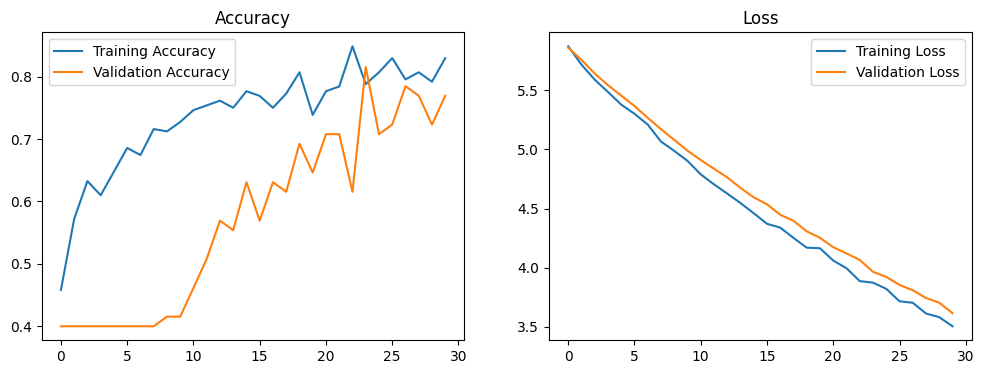

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.8163 - loss: 3.6129
Test Loss: 3.6141
Test Accuracy: 0.8182
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 309ms/step

Predictions:
1. File: no_pharyngitis (10).JPG | True Class: no_pharyngitis | Prediction: no_pharyngitis
2. File: no_pharyngitis (3).JPG | True Class: no_pharyngitis | Prediction: pharyngitis
3. File: pharyngitis (3).JPG | True Class: pharyngitis | Prediction: no_pharyngitis
4. File: no_pharyngitis (6).JPG | True Class: no_pharyngitis | Prediction: no_pharyngitis
5. File: no_pharyngitis (16).JPG | True Class: no_pharyngitis | Prediction: no_pharyngitis
6. File: no_pharyngitis (4).JPG | True Class: no_pharyngitis | Prediction: no_pharyngitis
7. File: no_pharyngitis (7).JPG | True Class: no_pharyngitis | Prediction: pharyngitis
8. File: no_pharyngitis (18).JPG | True Class: no_pharyngitis | Prediction: pharyngitis
9. File: no_pharyngitis (1).JPG | True Class: no_pharyngitis | Prediction: no_pharyngitis
10. File: pharyngitis (4).JPG | True

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model

# Data augmentation function
def create_train_val_generators(train_dir, target_size=(100, 100), batch_size=32):

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
    )


    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    val_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, val_generator


def load_test_data(test_dir, target_size=(100, 100)):

    file_paths = []
    labels = []

    for file in os.listdir(test_dir):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_paths.append(os.path.join(test_dir, file))

            if "no_pharyngitis" in file.lower():  #no_pharyngitis class
                labels.append("no_pharyngitis")
            elif "pharyngitis" in file.lower():  #pharyngitis class
                labels.append("pharyngitis")
            else:
                print(f"File skipped (does not match classes): {file}")


    df = pd.DataFrame({"filename": file_paths, "class": labels})

    print("DataFrame preview:")
    print(df.head())
    print("\nUnique classes:", df['class'].unique())
    print("Number of files in each class:")
    print(df['class'].value_counts())


    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_dataframe(
        dataframe=df,
        x_col="filename",
        y_col="class",
        target_size=target_size,
        batch_size=32,
        class_mode="binary",
        shuffle=False
    )

    return test_generator, df


train_dir = '/content/drive/MyDrive/Colab Notebooks/DEntosept/Dataset/Pharyngitis_dataset/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/DEntosept/Dataset/Pharyngitis_dataset/test'

#Preparing generators
train_generator, val_generator = create_train_val_generators(train_dir)
test_generator, df = load_test_data(test_dir)

#Transfer Learning model with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)


def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss")
    plt.legend()

    plt.show()

plot_training_history(history)


test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)


class_mapping = {0: 'no_pharyngitis', 1: 'pharyngitis'}
predicted_labels = [class_mapping[label] for label in predicted_classes.flatten()]


print("\nPredictions:")
for i, (filename, true_label, pred_label) in enumerate(zip(df['filename'], df['class'], predicted_labels)):
    print(f"{i+1}. File: {os.path.basename(filename)} | True Class: {true_label} | Prediction: {pred_label}")


true_classes = [1 if label == 'pharyngitis' else 0 for label in df['class']]
print("\nClassification - Report:")
print(classification_report(true_classes, predicted_classes.flatten(), target_names=['no_pharyngitis', 'pharyngitis']))


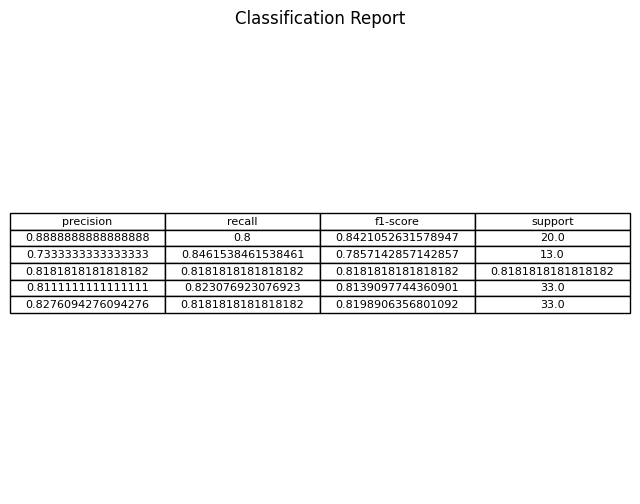

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

def plot_classification_report(true_classes, predicted_classes):
    #Generating classification report
    report = classification_report(true_classes, predicted_classes, target_names=['no_pharyngitis', 'pharyngitis'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    #Displaying the report as a table
    plt.figure(figsize=(8, 6))
    plt.table(cellText=report_df.values, colLabels=report_df.columns, loc='center', cellLoc='center', colLoc='center')
    plt.axis('off')
    plt.title("Classification Report")
    plt.show()

plot_classification_report(true_classes, predicted_classes.flatten())


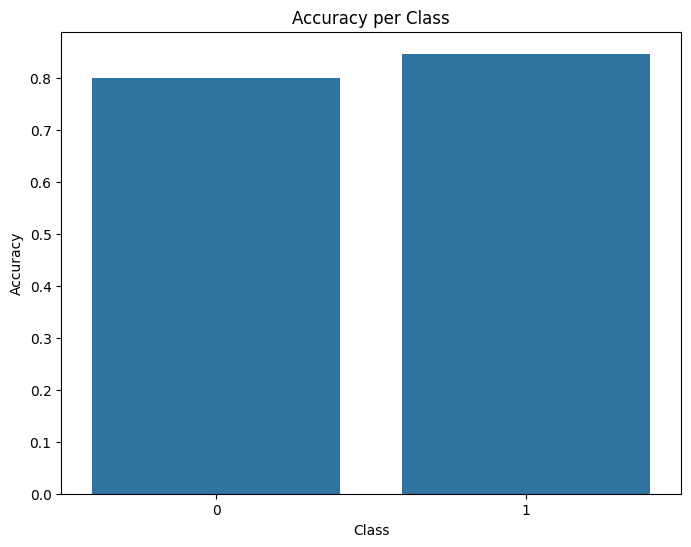

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_class_accuracy(true_classes, predicted_classes):

    class_accuracies = []
    for i in np.unique(true_classes):
        correct = np.sum((true_classes == i) & (predicted_classes == i))
        total = np.sum(true_classes == i)
        accuracy = correct / total
        class_accuracies.append((i, accuracy))


    class_accuracies_df = pd.DataFrame(class_accuracies, columns=['Class', 'Accuracy'])


    plt.figure(figsize=(8, 6))
    sns.barplot(x='Class', y='Accuracy', data=class_accuracies_df)
    plt.title('Accuracy per Class')
    plt.show()


plot_class_accuracy(true_classes, predicted_classes.flatten())
